# Exploratory data analysis

This notebook helps to understand the metadata better, incl. product portfolio per disease, missing data for treatment / antibodies and rating, as well as the distribution of the rating.

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
processed_data_path = Path("../data_preprocessing/data/preprocessed.csv")
df = pd.read_csv(processed_data_path)

In [3]:
df.head()

,text_index,medication,rate,comment,treatment,disease,antibody,processed_comment
0,0,Inflectra (infliximab) for Crohn's Disease,1.0,Insurance forced me to switch to inflectra due...,Inflectra,Crohn's Disease,infliximab,"['insurance', 'forced', 'switch', 'inflectra',..."
1,2,Remicade (infliximab) for Ulcerative Colitis,1.0,This medication Remicade made me in constant p...,Remicade,Ulcerative Colitis,infliximab,"['medication', 'remicade', 'made', 'constant',..."
2,3,Inflectra (infliximab) for Crohn's Disease,1.0,"I have Fistulizing Crohn's, dx'd 6 yrs ago @ 3...",Inflectra,Crohn's Disease,infliximab,"['fistulizing', 'crohn', 'dxd', 'yr', 'ago', '..."
3,4,Remicade (infliximab) for Ulcerative Colitis,10.0,Remicade literally gave me my life back 9 yrs ...,Remicade,Ulcerative Colitis,infliximab,"['remicade', 'literally', 'gave', 'life', 'bac..."
4,5,Remicade (infliximab) for Ulcerative Colitis,10.0,Life-changing. I once thought I was doomed to ...,Remicade,Ulcerative Colitis,infliximab,"['lifechanging', 'thought', 'doomed', 'life', ..."


## Missing data

In [4]:
print("Number of comments where the treatment is missing:", df.treatment.isna().sum())

Number of comments where the treatment is missing: 18


Let's have a look at the share of distributions of diseases where information about the treatment is missing.

In [5]:
df.loc[df.treatment.isna()].groupby("disease").disease.count()

disease
Crohn's Disease       10
Ulcerative Colitis     8
Name: disease, dtype: int64

In [6]:
df.loc[df.treatment.isna(), ["text_index", "comment"]]

,text_index,comment
54,89,I have been having infliximab infusions for Cr...
208,519,Started Vedolizamab for Crohn's diease April 2...
209,520,"Was in remission when I began entyvio, within ..."
212,523,10 years pancolitis. Slipping and sliding wit...
213,524,I had the worst experience with this medicatio...
217,528,Very Good Experience with vedolizuma\nStarted ...
218,529,I was severely ill from my diagnosis of ulcera...
219,530,I have had UC for about eight years and have b...
220,531,The good:\nIt worked incredibly well for me wh...
221,532,I've had Crohn's for 20 years now- worst area ...


In [7]:
print("Number of missing ratings:", df.rate.isna().sum())

Number of missing ratings: 14


Let's have a look at the share of distributions of diseases where information about the rating is missing.

In [8]:
df.loc[df.rate.isna()].groupby("disease").disease.count()

disease
Crohn's Disease       10
Ulcerative Colitis     4
Name: disease, dtype: int64

## Product portfolio

In [9]:
df.disease.value_counts()

disease
Crohn's Disease       159
Ulcerative Colitis    122
Name: count, dtype: int64

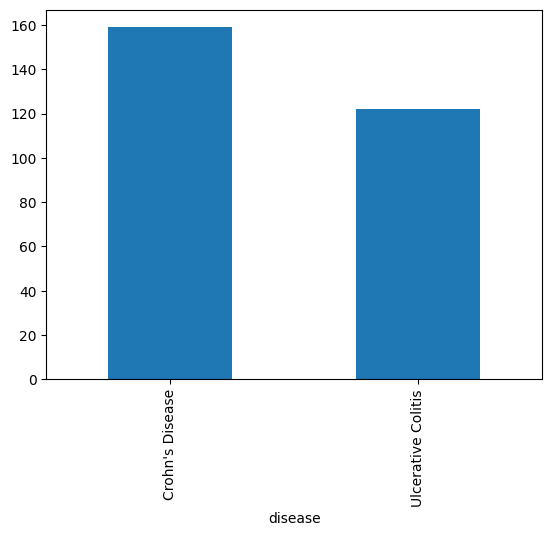

In [10]:
df.disease.value_counts().plot(kind='bar');

In [11]:
df.antibody.value_counts()

antibody
vedolizumab     110
infliximab       77
ustekinumab      29
adalimumab       26
certolizumab     11
golimumab         9
natalizumab       1
Name: count, dtype: int64

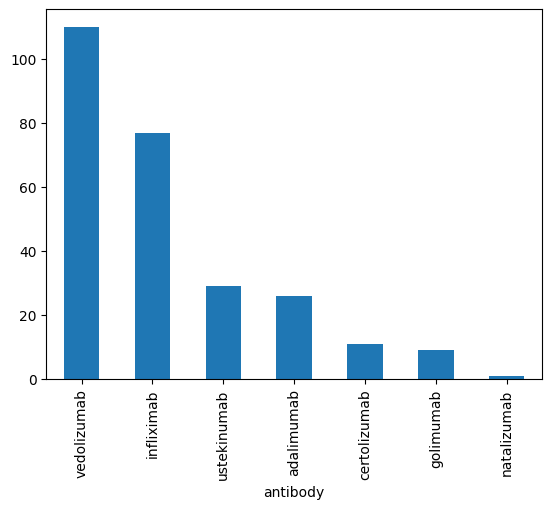

In [12]:
df.antibody.value_counts().plot(kind='bar');

In [13]:
df.treatment.value_counts()

treatment
Entyvio      110
Remicade      68
Stelara       29
Humira        26
Cimzia        11
Inflectra      9
Simponi        9
Tysabri        1
Name: count, dtype: int64

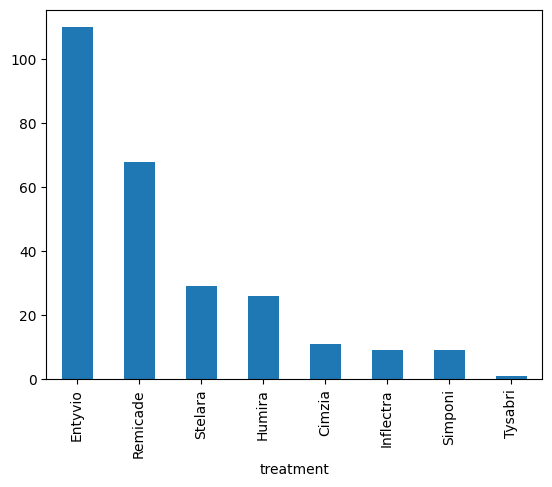

In [14]:
df.treatment.value_counts().plot(kind='bar');

In [15]:
df.groupby(["disease", "antibody", "treatment"]).treatment.count()

disease             antibody      treatment
Crohn's Disease     adalimumab    Humira       17
                    certolizumab  Cimzia       11
                    infliximab    Inflectra     6
                                  Remicade     38
                    natalizumab   Tysabri       1
                    ustekinumab   Stelara      27
                    vedolizumab   Entyvio      49
Ulcerative Colitis  adalimumab    Humira        9
                    golimumab     Simponi       9
                    infliximab    Inflectra     3
                                  Remicade     30
                    ustekinumab   Stelara       2
                    vedolizumab   Entyvio      61
Name: treatment, dtype: int64

## Rating

In [16]:
df.groupby(["disease", "antibody", "treatment"]).rate.agg("mean")

disease             antibody      treatment
Crohn's Disease     adalimumab    Humira        9.058824
                    certolizumab  Cimzia        7.818182
                    infliximab    Inflectra     2.500000
                                  Remicade      7.571429
                    natalizumab   Tysabri       3.000000
                    ustekinumab   Stelara       6.913043
                    vedolizumab   Entyvio       5.760870
Ulcerative Colitis  adalimumab    Humira        8.444444
                    golimumab     Simponi       5.555556
                    infliximab    Inflectra     1.000000
                                  Remicade      7.266667
                    ustekinumab   Stelara      10.000000
                    vedolizumab   Entyvio       5.649123
Name: rate, dtype: float64